## Coding Challenge #2
In this coding challenge, we are going to use the "Index, Violent, Property, and Firearm Rates By County: Beginning 1990" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

There are a few objectives you need to accomplish:

1) Examine the data set for any missing values. The attributes of interest are 'Violent Count', 'Property Count', and 'Population'

2) If there are any missing values, replace it with the median for that specific attribute within the corresponding County.

For example if the 'Violent Count' attribute for the county of Albany has missing values, then replace it with the median of the 'Violent Count' for the county of Albany
Note: If there are no missing values, you can use the data set as is

3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

4) Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

5) Contruct a Bee Swarm Plot to surface the spread of the 'Violent Count' by County from year 1990 to 2016 - just hone in on the following three counties: Bronx, New York and Queens

6) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Population' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

7) Hone in on the data set for the Year 2016. How does the 'Violent Count' and the 'Property Count' vary together? Construct a scatter plot that plots the 'Violent Count' v/s the Total Property Count' for each of the 3 Counties. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

8) Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx


In [0]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

df = pd.read_csv('https://data.ny.gov/api/views/34dd-6g2j/rows.csv?accessType=DOWNLOAD')

In [0]:
df = df[['County', 'Year', 'Violent Count', 'Property Count', 'Population']]
print(df.isnull().sum())

County            0
Year              0
Violent Count     0
Property Count    0
Population        0
dtype: int64


[10323. 13020. 20174.]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


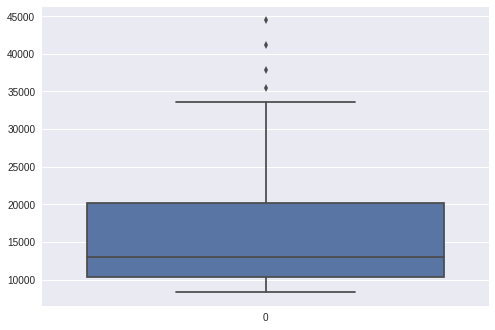

In [0]:
# 3) Construct a box plot to surface the 25%, 50% and 75% percentiles of the 'Violent Count' by County from year 1990 to 2016.
#    Just hone in on the following three counties: Bronx, New York and Queens.

df2 = df.loc[df['County'].isin(['Bronx', 'New York', 'Queens'])]
print(np.percentile(df2['Violent Count'], [25,50,75]))
sns.boxplot(data = list(df2['Violent Count']));

In [0]:
# 4) Compute the Variance and Standard Deviation of the 'Violent Count' by County from year 1990 to 2016.
#    Just hone in on the following three counties: Bronx, New York and Queens

print(df2['Violent Count'].var())
print(df2['Violent Count'].std())

77893357.50277779
8825.721358777297


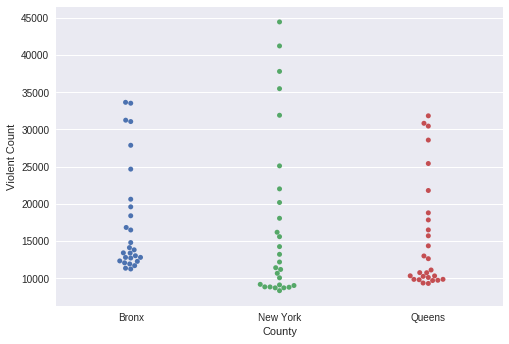

In [0]:
# 5) Contruct a Bee Swarm Plot to surface the spread of the 'Violent Count' by County from year 1990 to 2016
#    Just hone in on the following three counties: Bronx, New York and Queens

sns.swarmplot(x='County', y='Violent Count', data = df2)
plt.xlabel('County')
plt.ylabel('Violent Count')
plt.show()


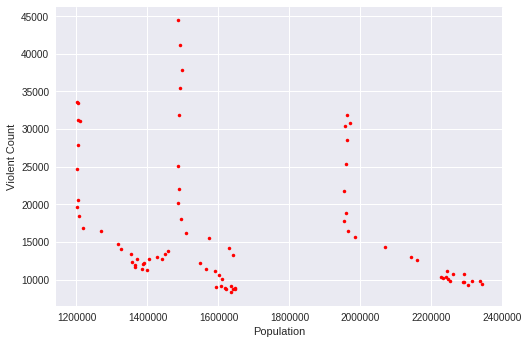

-1018741751.5963125


In [0]:
# 6) How does the 'Violent Count' and the 'Population' vary together?
#    Construct a scatter plot that plots the 'Violent Count' v/s the Total Population' for each of the 3 Counties.
#    Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.


pop = list(df2['Population'].values)
count = list(df2['Violent Count'].values)
plt.plot(pop, count, '.r');
plt.xlabel('Population')
plt.ylabel('Violent Count');
plt.show()

# Looks like, for each city, the violent count goes down non-linearly as population increases.

print(np.cov(pop, count)[0][1])

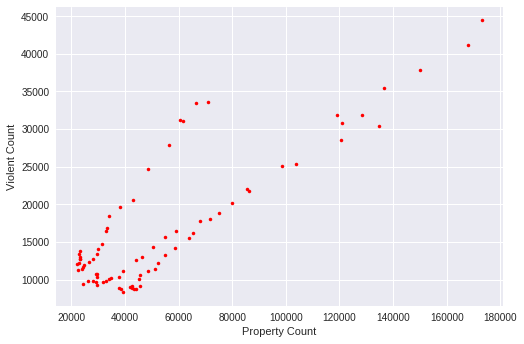

269831672.47083336


In [0]:
# 7) How does the 'Violent Count' and the 'Property Count' vary together?
#    Construct a scatter plot that plots the 'Violent Count' v/s the Total Property Count' for each of the 3 Counties.
#    Does the Scatter Plot point to a positive covariance? Now, compute the Covariance.

prop = list(df2['Property Count'].values)
count = list(df2['Violent Count'].values)
plt.plot(prop, count, '.r');
plt.xlabel('Property Count')
plt.ylabel('Violent Count');
plt.show()

# Look like, for each city, the property count and violent count have a positive linear correlation.

print(np.cov(prop, count)[0][1])

In [0]:
# 8) Compute the Correlation Coefficient between the 2 variable i.e. 'Violent Count' and the 'Population' for the county of Bronx

print(np.corrcoef(df2[df2['County']=='Bronx']['Violent Count'], df2[df2['County']=='Bronx']['Population'])[0][1])

-0.802718328253374
